# Iris Statistics

Using Fisher's 1936 set of measurements of three species of the iris flower to look at some statistical results.

### Sources

* https://www.kaggle.com/arshid/iris-flower-dataset - where I found the version of ./data/iris.csv that I'm using here.
* https://en.wikipedia.org/wiki/Iris_flower_data_set - a description of the dataset

```
     The data set consists of 50 samples from each of three species of Iris 
     (Iris setosa, Iris virginica and Iris versicolor). Four features were 
     measured from each sample: the length and the width of the sepals and petals, 
     in centimeters. Based on the combination of these four features, Fisher 
     developed a linear discriminant model to distinguish the species from each other.
     ... wikipedia
```

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg'>

Jim Mahoney | Feb 10 2020

In [19]:
# python modules

from matplotlib import pyplot as plt
from typing import Union, List

from scratch.statistics import *
from scratch.probability import *
from scratch.inference import *

import pprint
pp = pprint.PrettyPrinter(indent=4)      # see https://docs.python.org/3/library/pprint.html

<Figure size 432x288 with 0 Axes>

### Get the data

In [20]:
# Read in the raw data.

csv_filename = './data/iris.csv'

# column indices (See the first header line of the csv file.
(i_sepal_length, i_sepal_width, i_petal_length, i_petal_width, i_species) = [0, 1, 2, 3, 4]

raw_lines = open(csv_filename).readlines()[1:]  # skip the first header line.

print(f"number of lines in '{csv_filename}' is {len(raw_lines)}")
raw_lines[:3]

number of lines in './data/iris.csv' is 150


['5.1,3.5,1.4,0.2,Iris-setosa\n',
 '4.9,3,1.4,0.2,Iris-setosa\n',
 '4.7,3.2,1.3,0.2,Iris-setosa\n']

In [21]:
# Define a data conversion utility routine.

def cleanup(entry: str) -> Union[float, str]:
    """ Convert entries like '5.0' to 5.0, and those 'Iris-setosa' to 'setosa' """
    entry = entry.strip()                        # remove trailing newline
    try:
        entry = float(entry)                     # convert number string to float
    except:
        pass
    try:
        entry = entry.replace('Iris-', '')       # remove 'Iris-' prefix from species
    except:
        pass
    return entry

assert cleanup('3.2') == 3.2
assert cleanup('Iris-setosa\n') == 'setosa'


In [22]:
# Process the data raw data into an intermediate form.

iris_data = []
for line in raw_lines:
    iris_data.append( [cleanup(entry) for entry in line.split(',')] )

# See a sample.
iris_data[:5] + ['...'] + iris_data[-5:]       

[[5.1, 3.5, 1.4, 0.2, 'setosa'],
 [4.9, 3.0, 1.4, 0.2, 'setosa'],
 [4.7, 3.2, 1.3, 0.2, 'setosa'],
 [4.6, 3.1, 1.5, 0.2, 'setosa'],
 [5.0, 3.6, 1.4, 0.2, 'setosa'],
 '...',
 [6.7, 3.0, 5.2, 2.3, 'virginica'],
 [6.3, 2.5, 5.0, 1.9, 'virginica'],
 [6.5, 3.0, 5.2, 2.0, 'virginica'],
 [6.2, 3.4, 5.4, 2.3, 'virginica'],
 [5.9, 3.0, 5.1, 1.8, 'virginica']]

In [23]:
# Further process into a dictionary iris[specie][leaf][direction] = [list of 50 numbers]
#
# (The approach here - looping over all rows for each of everything -
#  is too slow for big datasets but works fine here.)

species = ('setosa', 'virginica', 'versicolor')
leaves = ('sepal', 'petal')
directions = ('length', 'width')

def is_species(row, specie: str) -> bool:
    """ True if this row matches this specie """
    # This will help me get the data from just one of the three species.
    return row[i_species] == specie

def is_leaf(index, leaf):
    """ True if this index matches the given leaf type """
    if leaf == 'sepal':
        return index in (i_sepal_length, i_sepal_width)
    if leaf == 'petal':
        return index in (i_petal_length, i_petal_width)
    return False

def is_direction(index, direction):
    """ True if this is index matches the given direction """
    if direction == 'length':
        return index in (i_sepal_length, i_petal_length)
    if direction == 'width':
        return index in (i_sepal_width, i_petal_width)
    return False

assert is_species(iris_data[0], 'setosa')
assert is_leaf(i_sepal_length, 'sepal')
assert is_direction(i_sepal_length, 'length')

iris = {}
for specie in species:
    iris[specie] = {}
    for leaf in leaves:
        iris[specie][leaf] = {}
        for direction in directions:
            iris[specie][leaf][direction] = [row[i] 
                                             for row in iris_data
                                             for i in (0,1,2,3)
                                             if is_species(row, specie)
                                             if is_leaf(i, leaf)
                                             if is_direction(i, direction)]

for specie in species:
    for leaf in leaves:
        for direction in directions:
            print(f'--- {specie} {leaf} {direction} ---')
            print( iris[specie][leaf][direction])

--- setosa sepal length ---
[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0]
--- setosa sepal width ---
[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3]
--- setosa petal length ---
[1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4]
--- setosa petal width ---
[0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0

### A bar chart

In [53]:
# Histogram counting
#
#    low                     high
#  |  .  |  .  |  .  |  .  |  .  |
#  |                             |
#  bucket_low                    bucket_high
#              <-   ->
#              bucket_size 
#

def get_buckets(low, high, n_buckets):
    """ return (bucket_edges, bucket_centers) given n=number of buckets, low & high bucket_centers """
    bucket_size = (high - low)/(n_buckets - 1)
    bucket_low = low - (bucket_size / 2)
    bucket_edges = [bucket_low + i * bucket_size for i in range(n_buckets + 1)]
    bucket_centers = [bucket_edges[i] + bucket_size/2 for i in range(n_buckets)]
    return (bucket_edges, bucket_centers)

def bucket_count(values, bucket_edges=None, n_buckets=None):
    """ Return counts of how many values are in each bucket """
    if not bucket_edges:
        (bucket_edges, bucket_centers) = get_buckets(min(values), max(values), n_buckets)
    if not n_buckets:
        n_buckets = len(bucket_edges) - 1
    counts = [0] * n_buckets
    for i in range(n_buckets):
        for value in values:
            if bucket_edges[i] < value <= bucket_edges[i+1]:
                counts[i] += 1
    return counts

test_values = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]
test_counts = bucket_count(test_values, n_buckets=5)
assert sum(test_counts) == len(test_values)
assert test_counts == [1, 2, 3, 4, 5]

In [63]:
# Count the petal lengths of the three species into buckets.

petal_lengths = [row[i_petal_length] for row in iris_data]

(lowest, highest) = (min(petal_lengths), max(petal_lengths))
n_buckets = 20

(edges, centers) = get_buckets(lowest, highest, n_buckets)
labels = [f'{c:.2f}' for c in centers]
bucket_size = centers[1] - centers[0]
bar_width = bucket_size * 0.8 / 3

counts = {specie : bucket_count(iris[specie]['petal']['length'], bucket_edges=edges) for specie in species}

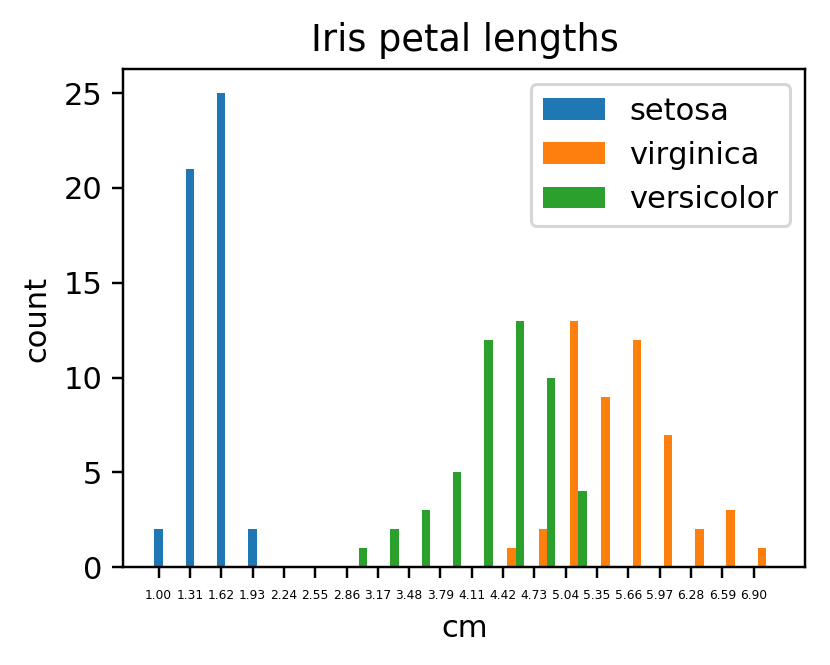

In [64]:
# A bar graph of petal lengths for all three species;
# see https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html

plt.figure(dpi=220, figsize=(4, 3))   # init & set size of the new plot (3" x 2", 220dpi)

offset = 0
for specie in species:    
    plt.bar([c + offset * bar_width for c in centers], counts[specie], bar_width, label=specie)
    offset += 1

plt.title('Iris petal lengths')
plt.ylabel("count")
plt.xlabel("cm")
plt.xticks(centers, labels, fontsize=4)
plt.legend()
#plt.xlim(bin_low, bin_hi)

plt.show ()

In [68]:
for specie in species:
    m = mean(iris[specie]['petal']['length'])
    sd = standard_deviation(iris[specie]['petal']['length'])
    print(f' {specie} : mean={m}, standard_deviation={sd}')

 setosa : mean=1.464, standard_deviation=0.1735111594364455
 virginica : mean=5.552, standard_deviation=0.5518946956639835
 versicolor : mean=4.26, standard_deviation=0.46991097723995806


### correlation

In [71]:
(x, y) = (iris['setosa']['petal']['length'], 
          iris['setosa']['petal']['width'])

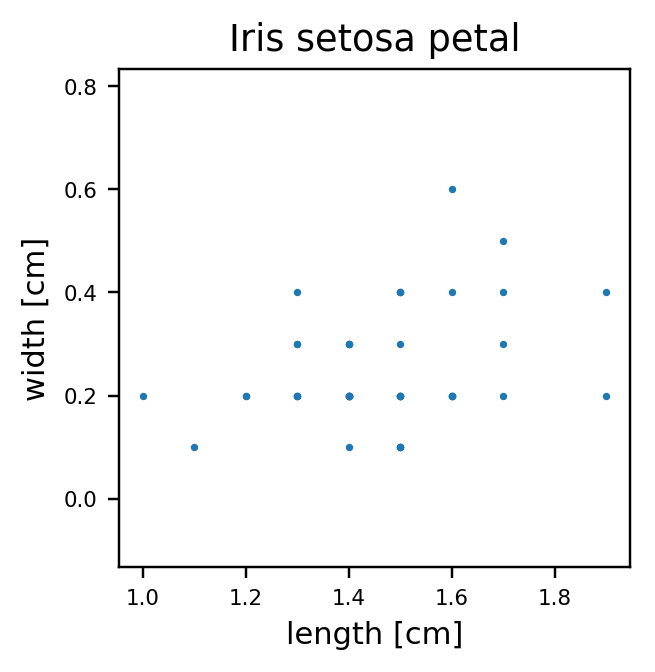

In [72]:
plt.figure(dpi=220, figsize=(3, 3))

plt.xticks(fontsize=7)   # Size set by trial and error.
plt.yticks(fontsize=7)   # (The changes from the last graph are still in effect.)

plt.scatter(x, y, s=2)    # s is marker size ; scalar or array (size of each one)

plt.title(f"Iris setosa petal")
plt.xlabel('length [cm]')
plt.ylabel('width [cm]')

plt.axis("equal")                     # set distance scale on the two axes the same

## The two types of flower parts have different skewness; this puts them on the same scale.
# plt.xlim(0.4, 0.8)
# plt.ylim(0.4, 0.8)

plt.show()



In [73]:
correlation(x, y)

0.3063082111580356